In [84]:
import pandas as pd
from sklearn.utils import resample
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.manifold import LocallyLinearEmbedding, SpectralEmbedding, Isomap
from sklearn.cluster import SpectralClustering
from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import accuracy_score
import time

In [85]:
data_train=pd.read_csv("./mnist_train.csv")
data_test=pd.read_csv("./mnist_test.csv")


In [86]:
undersampling_train_data=resample(data_train,replace=False,n_samples=2500,random_state=42)
undersampling_test_data=resample(data_test,replace=False,n_samples=2500,random_state=42)


In [87]:
#Split data 
X_train=undersampling_train_data[undersampling_train_data.columns[1:]] 
y_train=undersampling_train_data['label']
X_test=undersampling_test_data[undersampling_test_data.columns[1:]]
y_test=undersampling_test_data['label']

In [88]:
# Normalize data in the range [-1,1]
scaler = MinMaxScaler(feature_range=(-1,1))

# Fit only the training data in order to find the margin and then test to data without normalize them
scaler.fit(X_train)
features_scalar = scaler.transform(X_train)
features_validation_scalar = scaler.transform(X_test)

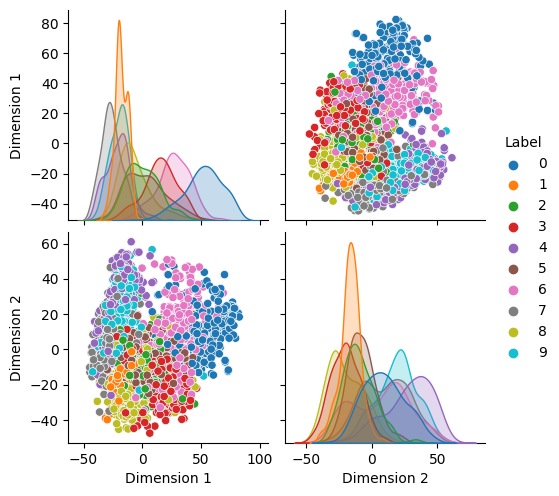

In [89]:
#Isometric Mapping
isomap = Isomap(n_neighbors=5, n_components=2)

#Transform data
features_embedded = isomap.fit_transform(features_scalar)
embedded_labels = pd.DataFrame({'Dimension 1': features_embedded[: ,0], 'Dimension 2': features_embedded[: ,1],'Label':y_train})
sns.color_palette("tab10")
sns.pairplot(embedded_labels, hue='Label', palette="tab10")
plt.show()

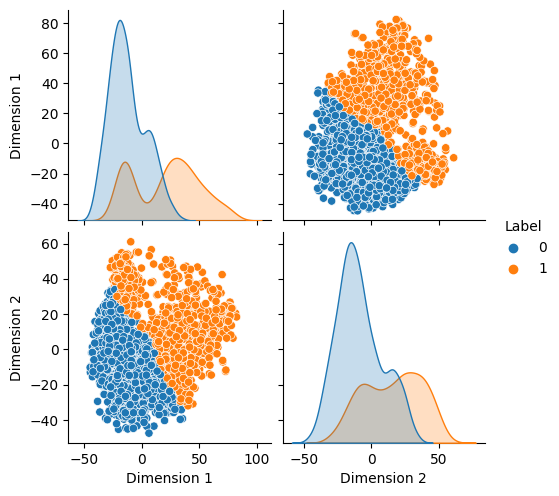

Clustering accuracy (homogeneity score):  9.97655597060897

Clustering accuracy (silhouette score):  0.36238687292011146

training time: 0.0010006427764892578 s



Classification accuracy:  21.240000000000002 




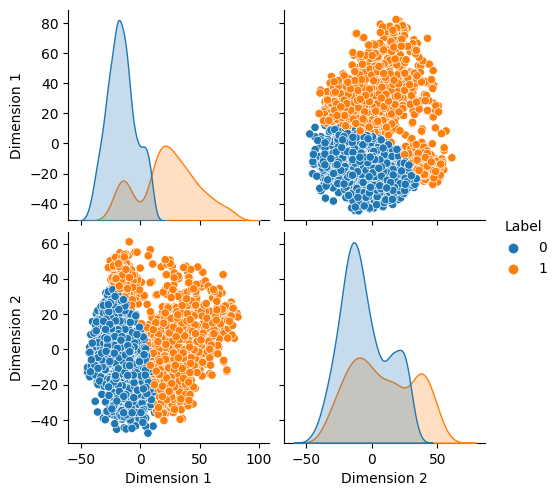

Clustering accuracy (homogeneity score):  11.306519254235708

Clustering accuracy (silhouette score):  0.36136989017940757

training time: 0.0010001659393310547 s



Classification accuracy:  21.240000000000002 




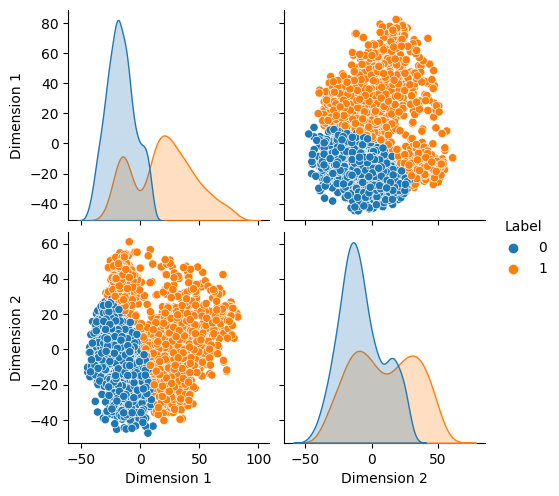

Clustering accuracy (homogeneity score):  10.31154060791524

Clustering accuracy (silhouette score):  0.33622410077772785

training time: 0.0010001659393310547 s



Classification accuracy:  21.240000000000002 




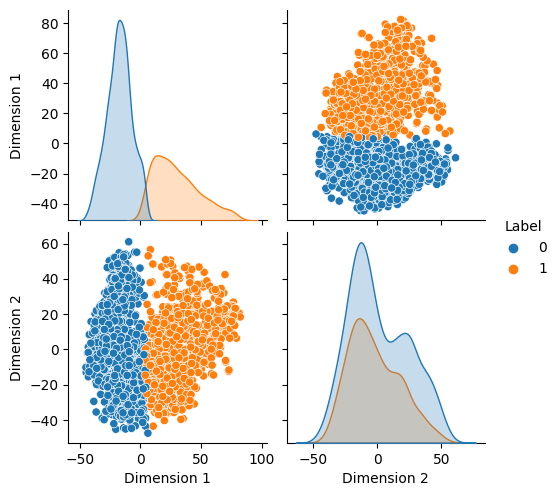

Clustering accuracy (homogeneity score):  16.603817474936022

Clustering accuracy (silhouette score):  0.4156308703112982

training time: 0.0009996891021728516 s



Classification accuracy:  20.48 




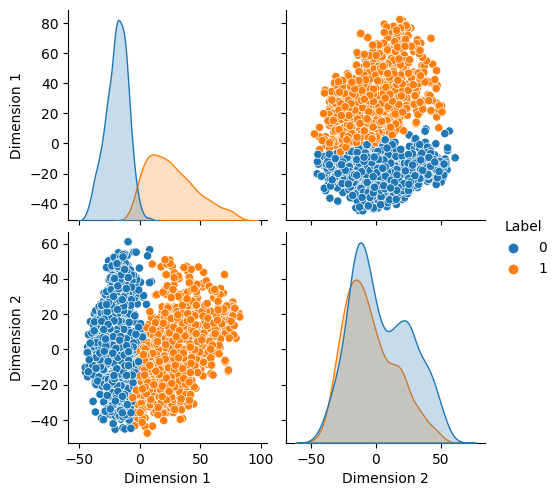

Clustering accuracy (homogeneity score):  18.25160387354084

Clustering accuracy (silhouette score):  0.4025616070315237

training time: 0.0 s



Classification accuracy:  21.0 




In [90]:
#Spectral Clustering

for i in range(5,30,5):
    spectralClustering = SpectralClustering(n_clusters=2, affinity= 'nearest_neighbors', n_neighbors=i)
    spectralClustering.fit(features_embedded)
    predicted_labels = spectralClustering.labels_
    embedded_labels = pd.DataFrame({'Dimension 1': features_embedded[: ,0], 'Dimension 2': features_embedded[: ,1],'Label': predicted_labels})
    sns.pairplot(embedded_labels, hue='Label',palette="tab10")
    plt.show()

    #More accurate implementation, considering opposite labels
    accuracy = homogeneity_score(y_train, predicted_labels)
    print ('Clustering accuracy (homogeneity score): ',accuracy*100)

    silhouette = silhouette_score(features_embedded, predicted_labels)
    print('Clustering accuracy (silhouette score): ',silhouette)
   
    #Dimension reduction 
    #Isometric Mapping
    isomap = Isomap(n_neighbors=5, n_components=2)
    
    #Transform data
    features_test_embedded = isomap.fit_transform(features_validation_scalar)
    
    clf = NearestCentroid()
    start_time=time.time()
    clf.fit(features_embedded, predicted_labels)
    end_time=time.time()
    print(f"training time: {end_time - start_time} s\n")
    predicted_labels = clf.predict(features_test_embedded)
    accuracy = accuracy_score(y_test, predicted_labels)		
    print ('Classification accuracy: ',accuracy*100, '\n')

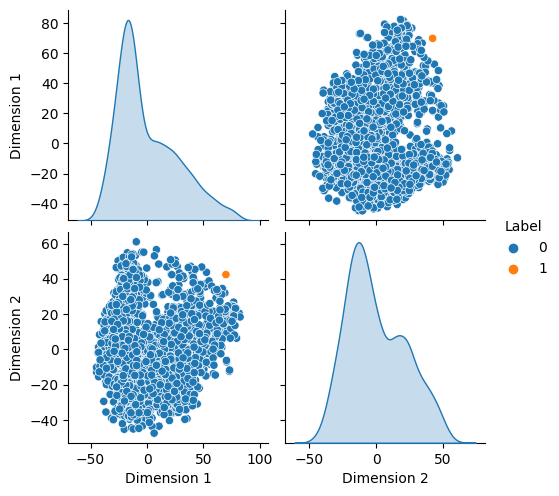

Clustering accuracy (homogeneity score):  0.04041238635537844

Clustering accuracy (silhouette score):  0.4333475196666266

training time: 0.0 s



Classification accuracy:  9.879999999999999 




In [91]:
spectralClustering = SpectralClustering(n_clusters=2, affinity= 'rbf')
spectralClustering.fit(features_embedded)
predicted_labels = spectralClustering.labels_
embedded_labels = pd.DataFrame({'Dimension 1': features_embedded[: ,0], 'Dimension 2': features_embedded[: ,1],'Label': predicted_labels})
sns.pairplot(embedded_labels, hue='Label',palette="tab10")
plt.show()

#More accurate implementation, considering opposite labels
accuracy = homogeneity_score(y_train, predicted_labels)
print ('Clustering accuracy (homogeneity score): ',accuracy*100)

silhouette = silhouette_score(features_embedded, predicted_labels)
print('Clustering accuracy (silhouette score): ',silhouette)
#clasify test_data 
#dimension reduction #Isometric Mapping
isomap = Isomap(n_neighbors=5, n_components=2)
#transform data
features_test_embedded = isomap.fit_transform(features_validation_scalar)
    
clf = NearestCentroid()
start_time=time.time()
clf.fit(features_embedded, predicted_labels)
end_time=time.time()
print(f"training time: {end_time - start_time} s\n")
predicted_labels = clf.predict(features_test_embedded)
accuracy = accuracy_score(y_test, predicted_labels)		
print ('Classification accuracy: ',accuracy*100, '\n')

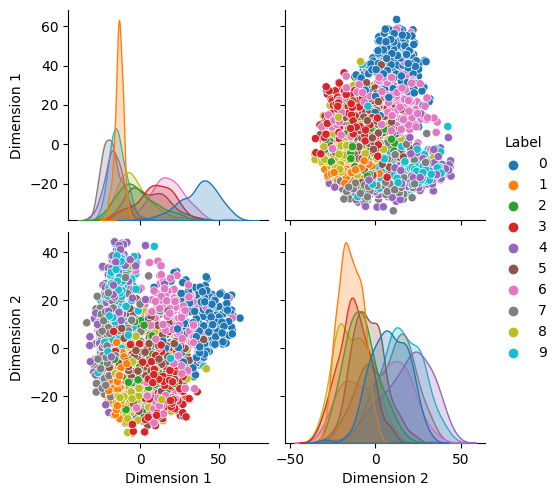

In [92]:
#Isometric Mapping
isomap = Isomap(n_neighbors=10, n_components=2)
#transform data
features_embedded = isomap.fit_transform(features_scalar)
embedded_labels = pd.DataFrame({'Dimension 1': features_embedded[: ,0], 'Dimension 2': features_embedded[: ,1],'Label':y_train})
sns.color_palette("tab10")
sns.pairplot(embedded_labels, hue='Label', palette="tab10")
plt.show()

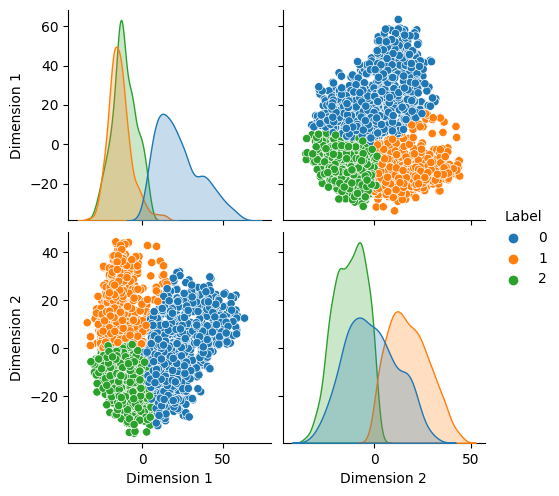

Clustering accuracy (homogeneity score):  24.06429585073793

Clustering accuracy (silhouette score):  0.43259970980745527

training time: 0.00099945068359375 s



Classification accuracy:  8.92 




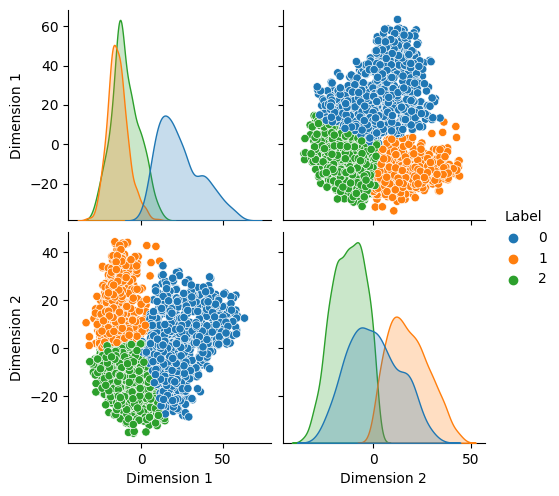

Clustering accuracy (homogeneity score):  24.361821786588507

Clustering accuracy (silhouette score):  0.4404912025542544

training time: 0.0010001659393310547 s



Classification accuracy:  8.84 




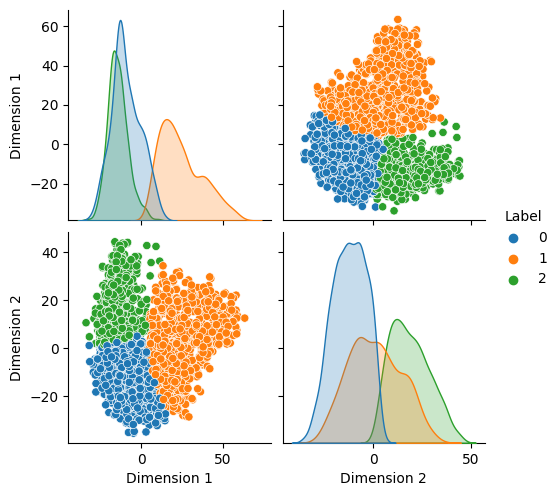

Clustering accuracy (homogeneity score):  24.066102031519303

Clustering accuracy (silhouette score):  0.44516943351592847

training time: 0.0010001659393310547 s



Classification accuracy:  22.24 




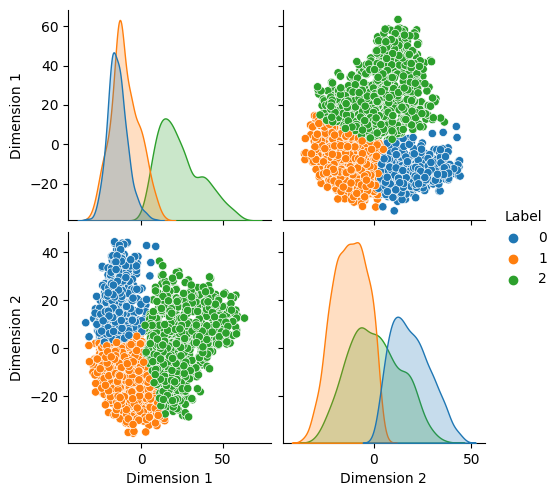

Clustering accuracy (homogeneity score):  24.206193846603494

Clustering accuracy (silhouette score):  0.4434412436900183

training time: 0.0 s



Classification accuracy:  0.6799999999999999 




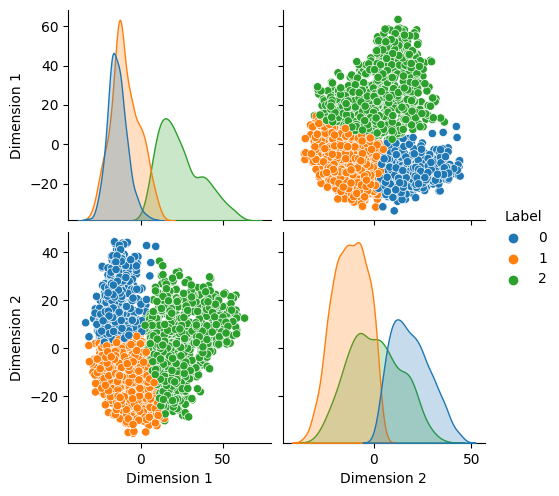

Clustering accuracy (homogeneity score):  24.15808414365227

Clustering accuracy (silhouette score):  0.4444775689540289

training time: 0.0 s



Classification accuracy:  0.64 




In [93]:
#Spectral Clustering

for i in range(5,30,5):
    spectralClustering = SpectralClustering(n_clusters=3, affinity= 'nearest_neighbors', n_neighbors=i)
    spectralClustering.fit(features_embedded)
    predicted_labels = spectralClustering.labels_
    embedded_labels = pd.DataFrame({'Dimension 1': features_embedded[: ,0], 'Dimension 2': features_embedded[: ,1],'Label': predicted_labels})
    sns.pairplot(embedded_labels, hue='Label',palette="tab10")
    plt.show()

    #More accurate implementation, considering opposite labels
    accuracy = homogeneity_score(y_train, predicted_labels)
    print ('Clustering accuracy (homogeneity score): ',accuracy*100)

    silhouette = silhouette_score(features_embedded, predicted_labels)
    print('Clustering accuracy (silhouette score): ',silhouette)
   
    #dimension reduction 
    #Isometric Mapping
    isomap = Isomap(n_neighbors=10, n_components=2)
    
    #Transform data
    features_test_embedded = isomap.fit_transform(features_validation_scalar)
    
    clf = NearestCentroid()
    start_time=time.time()
    clf.fit(features_embedded, predicted_labels)
    end_time=time.time()
    print(f"training time: {end_time - start_time} s\n")
    predicted_labels = clf.predict(features_test_embedded)
    accuracy = accuracy_score(y_test, predicted_labels)		
    print ('Classification accuracy: ',accuracy*100, '\n')

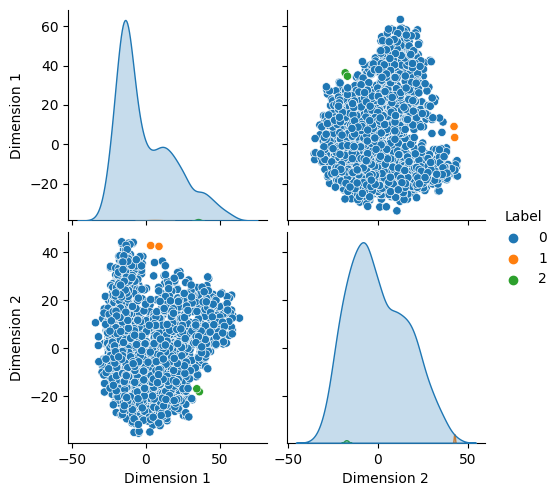

Clustering accuracy (homogeneity score):  0.11252940925545092

Clustering accuracy (silhouette score):  0.06151432665654504

training time: 0.0009996891021728516 s



Classification accuracy:  13.52 




In [94]:
spectralClustering = SpectralClustering(n_clusters=3, affinity= 'rbf')
spectralClustering.fit(features_embedded)
predicted_labels = spectralClustering.labels_
embedded_labels = pd.DataFrame({'Dimension 1': features_embedded[: ,0], 'Dimension 2': features_embedded[: ,1],'Label': predicted_labels})
sns.pairplot(embedded_labels, hue='Label',palette="tab10")
plt.show()

#More accurate implementation, considering opposite labels
accuracy = homogeneity_score(y_train, predicted_labels)
print ('Clustering accuracy (homogeneity score): ',accuracy*100)

silhouette = silhouette_score(features_embedded, predicted_labels)
print('Clustering accuracy (silhouette score): ',silhouette)
#clasify test_data 
#dimension reduction #Isometric Mapping
isomap = Isomap(n_neighbors=10, n_components=2)
#transform data
features_test_embedded = isomap.fit_transform(features_validation_scalar)
    
clf = NearestCentroid()
start_time=time.time()
clf.fit(features_embedded, predicted_labels)
end_time=time.time()
print(f"training time: {end_time - start_time} s\n")
predicted_labels = clf.predict(features_test_embedded)
accuracy = accuracy_score(y_test, predicted_labels)		
print ('Classification accuracy: ',accuracy*100, '\n')

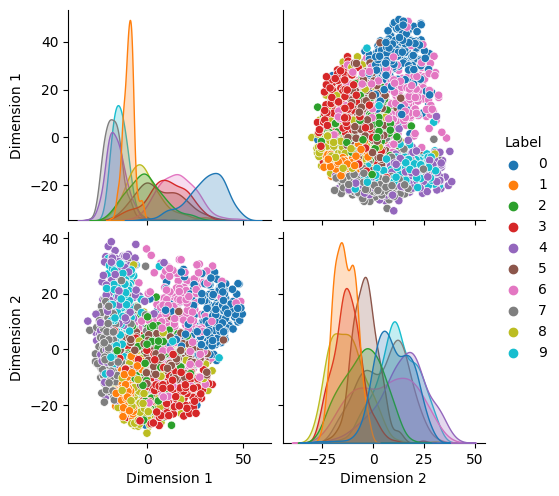

In [95]:
#Isometric Mapping
isomap = Isomap(n_neighbors=15, n_components=2)
#transform data
features_embedded = isomap.fit_transform(features_scalar)
embedded_labels = pd.DataFrame({'Dimension 1': features_embedded[: ,0], 'Dimension 2': features_embedded[: ,1],'Label':y_train})
sns.color_palette("tab10")
sns.pairplot(embedded_labels, hue='Label', palette="tab10")
plt.show()

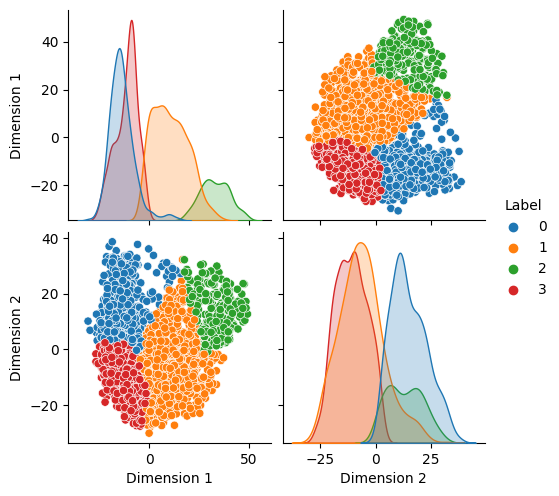

Clustering accuracy (homogeneity score):  29.79552198328316

Clustering accuracy (silhouette score):  0.3920494254363839

training time: 0.0 s



Classification accuracy:  18.64 




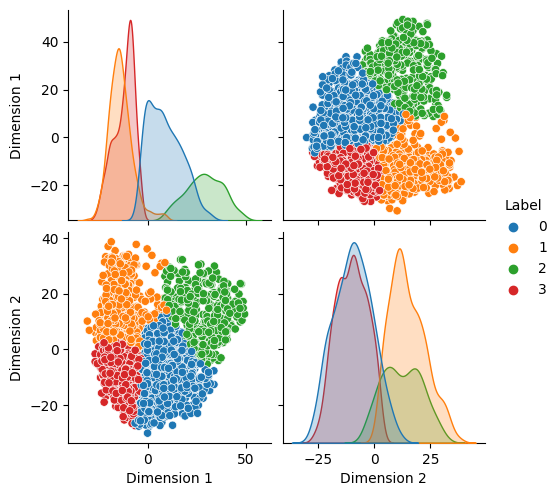

Clustering accuracy (homogeneity score):  31.416686854957298

Clustering accuracy (silhouette score):  0.40330810264752365

training time: 0.0009996891021728516 s



Classification accuracy:  10.36 




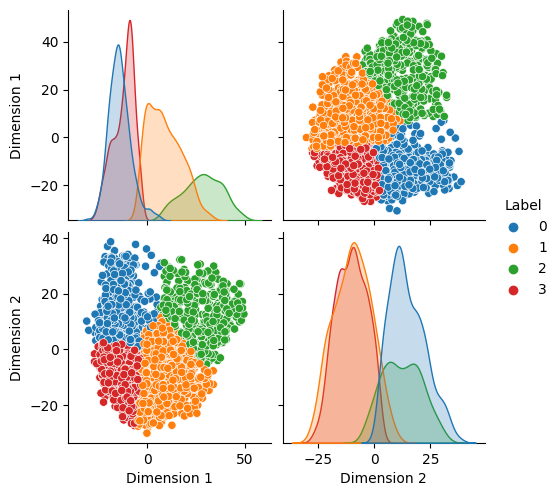

Clustering accuracy (homogeneity score):  31.636691153041802

Clustering accuracy (silhouette score):  0.4075718354408337

training time: 0.0010001659393310547 s



Classification accuracy:  17.16 




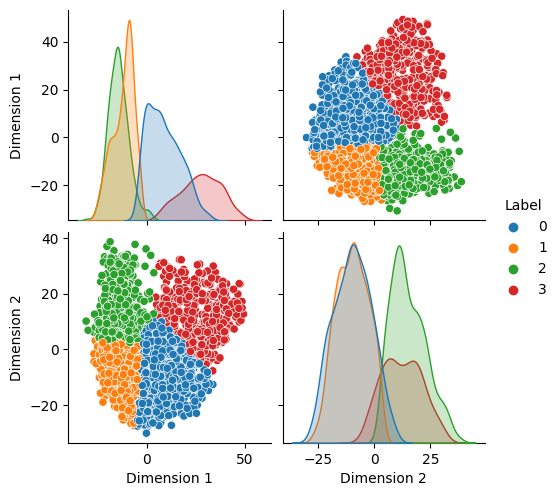

Clustering accuracy (homogeneity score):  31.7242580720581

Clustering accuracy (silhouette score):  0.407979925506782

training time: 0.0009999275207519531 s



Classification accuracy:  6.84 




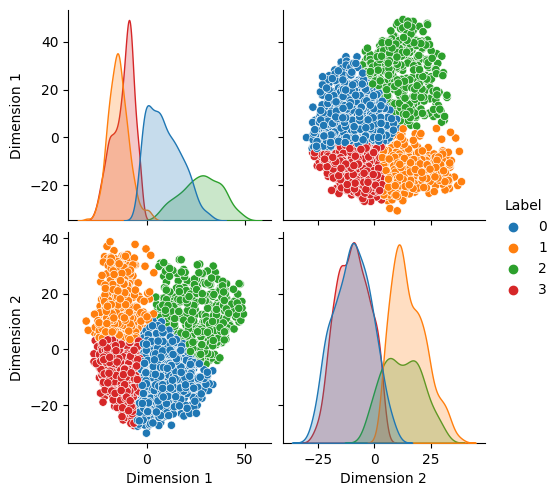

Clustering accuracy (homogeneity score):  31.653312043751747

Clustering accuracy (silhouette score):  0.40695603117799967

training time: 0.0 s



Classification accuracy:  10.040000000000001 




In [96]:
#Spectral Clustering

for i in range(5,30,5):
    spectralClustering = SpectralClustering(n_clusters=4, affinity= 'nearest_neighbors', n_neighbors=i)
    spectralClustering.fit(features_embedded)
    predicted_labels = spectralClustering.labels_
    embedded_labels = pd.DataFrame({'Dimension 1': features_embedded[: ,0], 'Dimension 2': features_embedded[: ,1],'Label': predicted_labels})
    sns.pairplot(embedded_labels, hue='Label',palette="tab10")
    plt.show()

    #More accurate implementation, considering opposite labels
    accuracy = homogeneity_score(y_train, predicted_labels)
    print ('Clustering accuracy (homogeneity score): ',accuracy*100)

    silhouette = silhouette_score(features_embedded, predicted_labels)
    print('Clustering accuracy (silhouette score): ',silhouette)
   
    #dimension reduction #Isometric Mapping
    isomap = Isomap(n_neighbors=15, n_components=2)
    #transform data
    features_test_embedded = isomap.fit_transform(features_validation_scalar)
    
    clf = NearestCentroid()
    start_time=time.time()
    clf.fit(features_embedded, predicted_labels)
    end_time=time.time()
    print(f"training time: {end_time - start_time} s\n")
    predicted_labels = clf.predict(features_test_embedded)
    accuracy = accuracy_score(y_test, predicted_labels)		
    print ('Classification accuracy: ',accuracy*100, '\n')

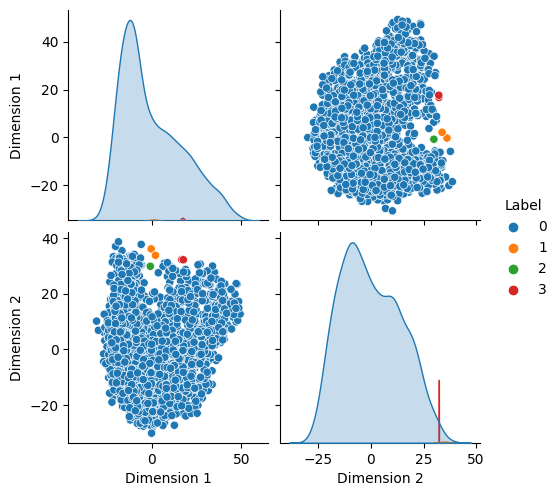

Clustering accuracy (homogeneity score):  0.1974412612518957

Clustering accuracy (silhouette score):  0.12495350075969527

training time: 0.0 s



Classification accuracy:  10.2 




In [97]:
spectralClustering = SpectralClustering(n_clusters=4, affinity= 'rbf')
spectralClustering.fit(features_embedded)
predicted_labels = spectralClustering.labels_
embedded_labels = pd.DataFrame({'Dimension 1': features_embedded[: ,0], 'Dimension 2': features_embedded[: ,1],'Label': predicted_labels})
sns.pairplot(embedded_labels, hue='Label',palette="tab10")
plt.show()

#More accurate implementation, considering opposite labels
accuracy = homogeneity_score(y_train, predicted_labels)
print ('Clustering accuracy (homogeneity score): ',accuracy*100)

silhouette = silhouette_score(features_embedded, predicted_labels)
print('Clustering accuracy (silhouette score): ',silhouette)
#clasify test_data 
#dimension reduction #Isometric Mapping
isomap = Isomap(n_neighbors=15, n_components=2)
#transform data
features_test_embedded = isomap.fit_transform(features_validation_scalar)
    
clf = NearestCentroid()
start_time=time.time()
clf.fit(features_embedded, predicted_labels)
end_time=time.time()
print(f"training time: {end_time - start_time} s\n")
predicted_labels = clf.predict(features_test_embedded)
accuracy = accuracy_score(y_test, predicted_labels)		
print ('Classification accuracy: ',accuracy*100, '\n')

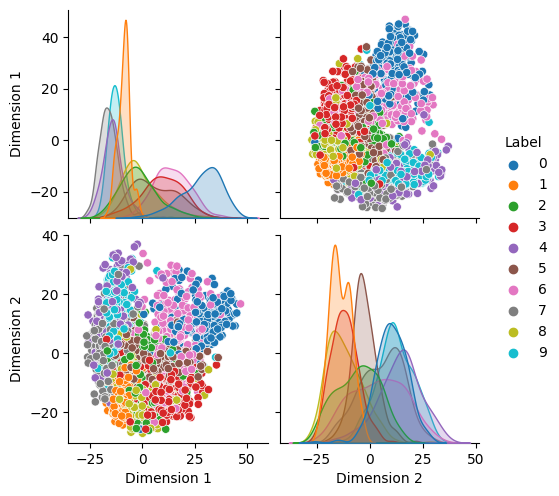

In [98]:
#Isometric Mapping
isomap = Isomap(n_neighbors=20, n_components=2)
#transform data
features_embedded = isomap.fit_transform(features_scalar)
embedded_labels = pd.DataFrame({'Dimension 1': features_embedded[: ,0], 'Dimension 2': features_embedded[: ,1],'Label':y_train})
sns.color_palette("tab10")
sns.pairplot(embedded_labels, hue='Label', palette="tab10")
plt.show()

c:\Users\eimai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.

  warnings.warn(


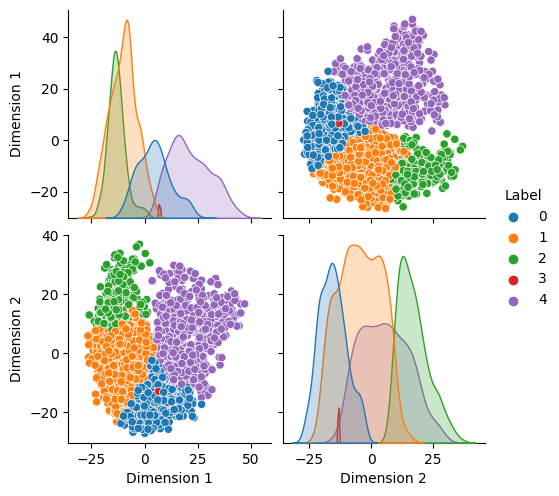

Clustering accuracy (homogeneity score):  26.76113807430068

Clustering accuracy (silhouette score):  0.16592774604436203

training time: 0.0 s



Classification accuracy:  18.92 




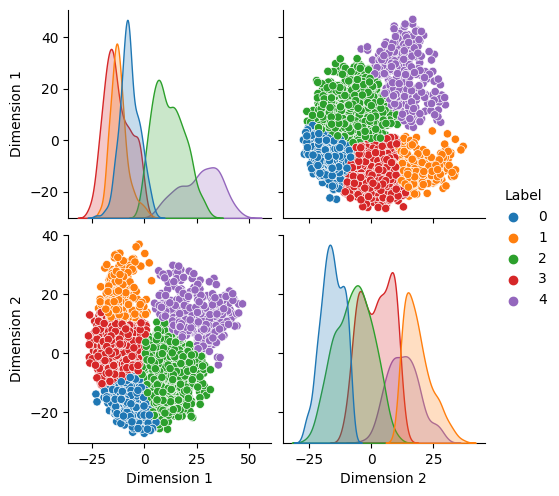

Clustering accuracy (homogeneity score):  32.836921950937445

Clustering accuracy (silhouette score):  0.3686935097506176

training time: 0.0009996891021728516 s



Classification accuracy:  10.84 




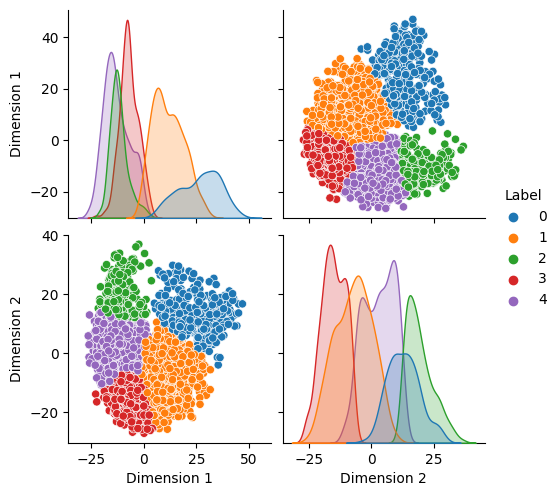

Clustering accuracy (homogeneity score):  33.38756068999072

Clustering accuracy (silhouette score):  0.3711917322083194

training time: 0.0 s



Classification accuracy:  15.559999999999999 




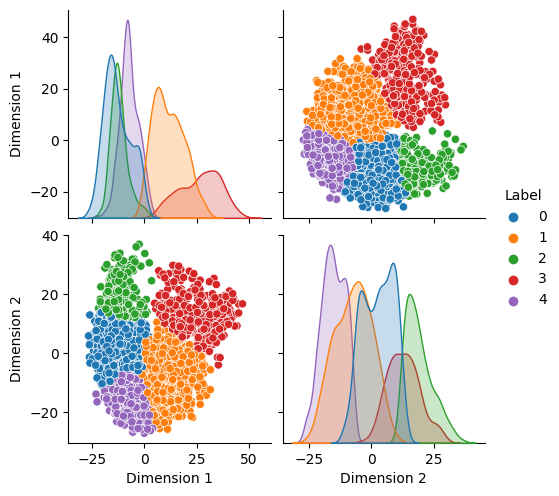

Clustering accuracy (homogeneity score):  33.38325917065232

Clustering accuracy (silhouette score):  0.37084443275026846

training time: 0.0010004043579101562 s



Classification accuracy:  12.64 




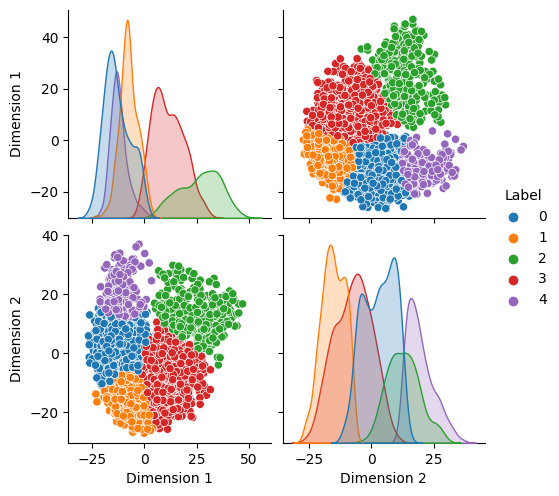

Clustering accuracy (homogeneity score):  33.33568371979661

Clustering accuracy (silhouette score):  0.3681723363017884

training time: 0.0010001659393310547 s



Classification accuracy:  7.920000000000001 




In [99]:
#Spectral Clustering

for i in range(5,30,5):
    spectralClustering = SpectralClustering(n_clusters=5, affinity= 'nearest_neighbors', n_neighbors=i)
    spectralClustering.fit(features_embedded)
    predicted_labels = spectralClustering.labels_
    embedded_labels = pd.DataFrame({'Dimension 1': features_embedded[: ,0], 'Dimension 2': features_embedded[: ,1],'Label': predicted_labels})
    sns.pairplot(embedded_labels, hue='Label',palette="tab10")
    plt.show()

    #More accurate implementation, considering opposite labels
    accuracy = homogeneity_score(y_train, predicted_labels)
    print ('Clustering accuracy (homogeneity score): ',accuracy*100)

    silhouette = silhouette_score(features_embedded, predicted_labels)
    print('Clustering accuracy (silhouette score): ',silhouette)
   
    #dimension reduction #Isometric Mapping
    isomap = Isomap(n_neighbors=20, n_components=2)
    #transform data
    features_test_embedded = isomap.fit_transform(features_validation_scalar)
    
    clf = NearestCentroid()
    start_time=time.time()
    clf.fit(features_embedded, predicted_labels)
    end_time=time.time()
    print(f"training time: {end_time - start_time} s\n")
    predicted_labels = clf.predict(features_test_embedded)
    accuracy = accuracy_score(y_test, predicted_labels)		
    print ('Classification accuracy: ',accuracy*100, '\n')

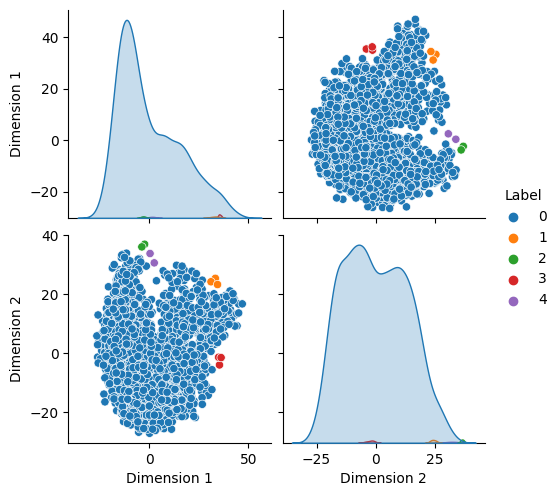

Clustering accuracy (homogeneity score):  0.3125019728859188

Clustering accuracy (silhouette score):  0.0693723294498111

training time: 0.0010001659393310547 s



Classification accuracy:  10.4 




In [100]:
spectralClustering = SpectralClustering(n_clusters=5, affinity= 'rbf')
spectralClustering.fit(features_embedded)
predicted_labels = spectralClustering.labels_
embedded_labels = pd.DataFrame({'Dimension 1': features_embedded[: ,0], 'Dimension 2': features_embedded[: ,1],'Label': predicted_labels})
sns.pairplot(embedded_labels, hue='Label',palette="tab10")
plt.show()

#More accurate implementation, considering opposite labels
accuracy = homogeneity_score(y_train, predicted_labels)
print ('Clustering accuracy (homogeneity score): ',accuracy*100)

silhouette = silhouette_score(features_embedded, predicted_labels)
print('Clustering accuracy (silhouette score): ',silhouette)
#clasify test_data 
#dimension reduction #Isometric Mapping
isomap = Isomap(n_neighbors=20, n_components=2)
#transform data
features_test_embedded = isomap.fit_transform(features_validation_scalar)
    
clf = NearestCentroid()
start_time=time.time()
clf.fit(features_embedded, predicted_labels)
end_time=time.time()
print(f"training time: {end_time - start_time} s\n")
predicted_labels = clf.predict(features_test_embedded)
accuracy = accuracy_score(y_test, predicted_labels)		
print ('Classification accuracy: ',accuracy*100, '\n')

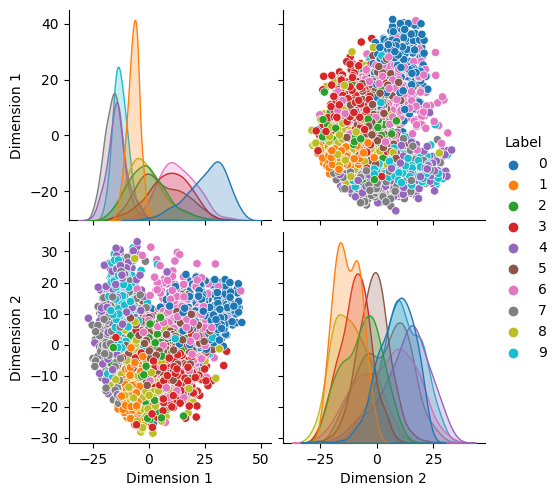

In [101]:
#Isometric Mapping
isomap = Isomap(n_neighbors=25, n_components=2)
#transform data
features_embedded = isomap.fit_transform(features_scalar)
embedded_labels = pd.DataFrame({'Dimension 1': features_embedded[: ,0], 'Dimension 2': features_embedded[: ,1],'Label':y_train})
sns.color_palette("tab10")
sns.pairplot(embedded_labels, hue='Label', palette="tab10")
plt.show()

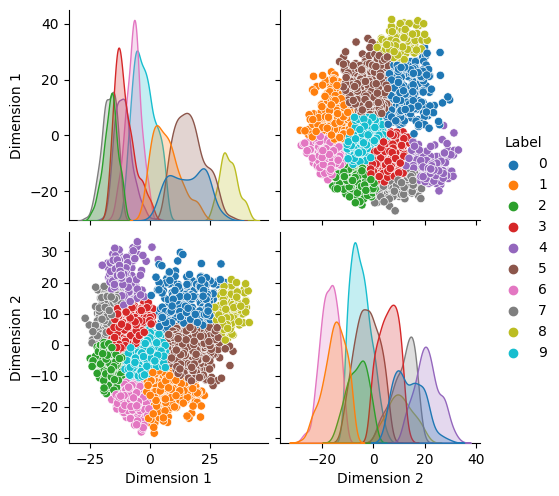

Clustering accuracy (homogeneity score):  37.714638894669264

Clustering accuracy (silhouette score):  0.32539575998112097

training time: 0.0010006427764892578 s



Classification accuracy:  6.6000000000000005 




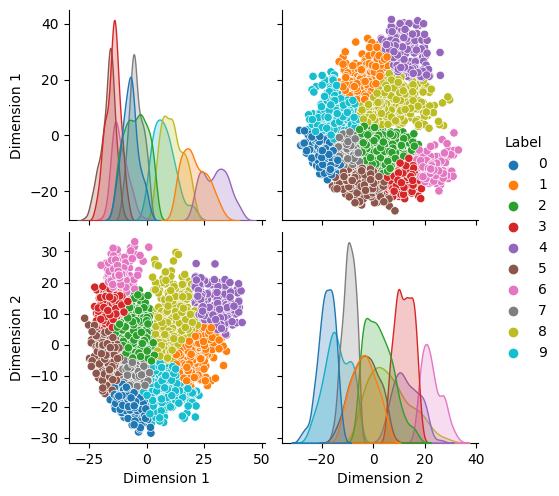

Clustering accuracy (homogeneity score):  36.2338090171123

Clustering accuracy (silhouette score):  0.3156945642461009

training time: 0.0010006427764892578 s



Classification accuracy:  6.959999999999999 




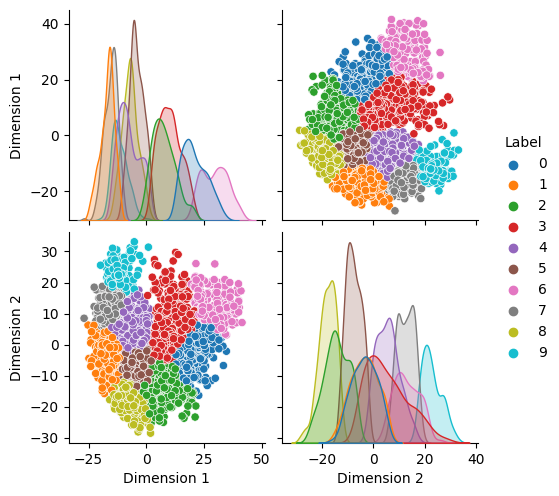

Clustering accuracy (homogeneity score):  36.84668786977447

Clustering accuracy (silhouette score):  0.33124279783235006

training time: 0.0009996891021728516 s



Classification accuracy:  5.16 




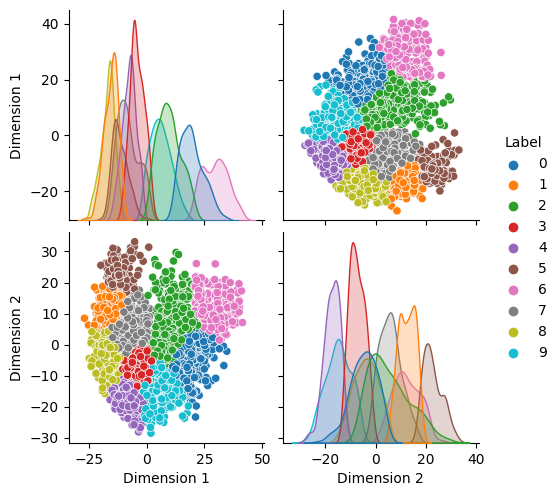

Clustering accuracy (homogeneity score):  37.120323426567964

Clustering accuracy (silhouette score):  0.3352950210439969

training time: 0.0010006427764892578 s



Classification accuracy:  4.96 




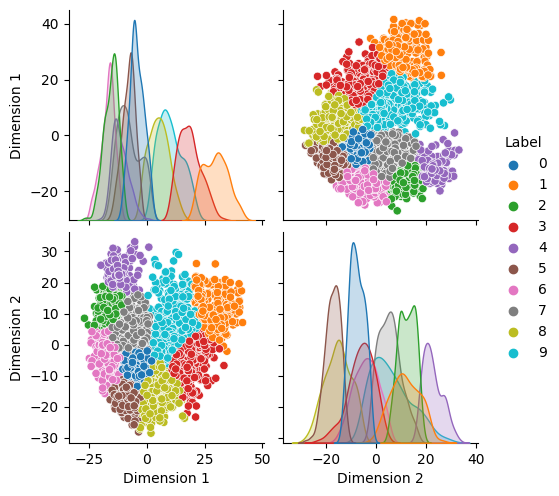

Clustering accuracy (homogeneity score):  37.636516419549146

Clustering accuracy (silhouette score):  0.33510068120198605

training time: 0.0009996891021728516 s



Classification accuracy:  17.2 




In [102]:
#Spectral Clustering

for i in range(5,30,5):
    spectralClustering = SpectralClustering(n_clusters=10, affinity= 'nearest_neighbors', n_neighbors=i)
    spectralClustering.fit(features_embedded)
    predicted_labels = spectralClustering.labels_
    embedded_labels = pd.DataFrame({'Dimension 1': features_embedded[: ,0], 'Dimension 2': features_embedded[: ,1],'Label': predicted_labels})
    sns.pairplot(embedded_labels, hue='Label',palette="tab10")
    plt.show()

    #More accurate implementation, considering opposite labels
    accuracy = homogeneity_score(y_train, predicted_labels)
    print ('Clustering accuracy (homogeneity score): ',accuracy*100)

    silhouette = silhouette_score(features_embedded, predicted_labels)
    print('Clustering accuracy (silhouette score): ',silhouette)
   
    #dimension reduction #Isometric Mapping
    isomap = Isomap(n_neighbors=25, n_components=2)
    #transform data
    features_test_embedded = isomap.fit_transform(features_validation_scalar)
    
    clf = NearestCentroid()
    start_time=time.time()
    clf.fit(features_embedded, predicted_labels)
    end_time=time.time()
    print(f"training time: {end_time - start_time} s\n")
    predicted_labels = clf.predict(features_test_embedded)
    accuracy = accuracy_score(y_test, predicted_labels)		
    print ('Classification accuracy: ',accuracy*100, '\n')

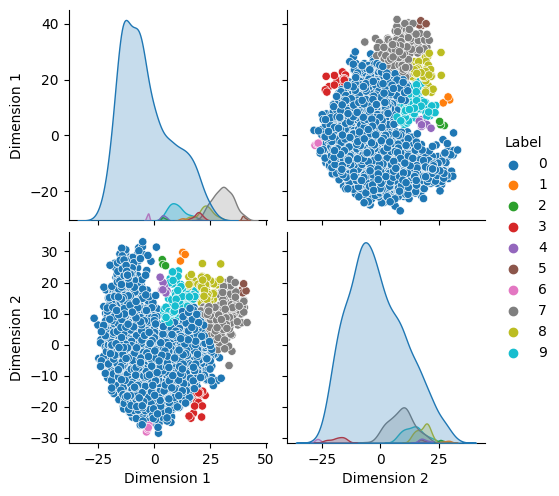

Clustering accuracy (homogeneity score):  10.968339236476849

Clustering accuracy (silhouette score):  -0.11436887325788866

training time: 0.0010004043579101562 s



Classification accuracy:  18.64 




In [103]:
spectralClustering = SpectralClustering(n_clusters=10, affinity= 'rbf')
spectralClustering.fit(features_embedded)
predicted_labels = spectralClustering.labels_
embedded_labels = pd.DataFrame({'Dimension 1': features_embedded[: ,0], 'Dimension 2': features_embedded[: ,1],'Label': predicted_labels})
sns.pairplot(embedded_labels, hue='Label',palette="tab10")
plt.show()

#More accurate implementation, considering opposite labels
accuracy = homogeneity_score(y_train, predicted_labels)
print ('Clustering accuracy (homogeneity score): ',accuracy*100)

silhouette = silhouette_score(features_embedded, predicted_labels)
print('Clustering accuracy (silhouette score): ',silhouette)
#clasify test_data 
#dimension reduction #Isometric Mapping
isomap = Isomap(n_neighbors=25, n_components=2)
#transform data
features_test_embedded = isomap.fit_transform(features_validation_scalar)
    
clf = NearestCentroid()
start_time=time.time()
clf.fit(features_embedded, predicted_labels)
end_time=time.time()
print(f"training time: {end_time - start_time} s\n")
predicted_labels = clf.predict(features_test_embedded)
accuracy = accuracy_score(y_test, predicted_labels)		
print ('Classification accuracy: ',accuracy*100, '\n')